In [ ]:
pip install hockey-rink

  Preparing metadata (setup.py) ... done
  Created wheel for hockey-rink: filename=hockey_rink-1.0.2-py3-none-any.whl size=39989 sha256=b2c37e2d4de35f86024e1b8bb4beb3feb56af263fa07ed5d8e9cb5f37d7bbe8e
  Stored in directory: /root/.cache/pip/wheels/fb/86/f7/cf6cb830f048b17017420b4dcd6ce16348ae09bc2b8f30ac2b
Successfully built hockey-rink


In [ ]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from hockey_rink import NHLRink, RinkImage
import plotly.express as px
import altair as alt

In [ ]:
#https://drive.google.com/file/d/1rN0qnG3TjyvY2LqX6Tk7LLFooFVoRAvg/view?usp=drive_link



shots2022=pd.read_csv('https://drive.google.com/uc?id=1rN0qnG3TjyvY2LqX6Tk7LLFooFVoRAvg')

In [ ]:
shots2022.head()

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
0,0,43.0,47.0,47.0,8.0,8.0,0.0,0,0,0,...,44,0.214393,0.026009,0.398742,0.300830,0.022987,0.037040,0.710473,8,8
1,1,51.0,45.0,45.0,26.0,26.0,0.0,0,0,0,...,44,0.186673,0.007774,0.455486,0.294453,0.020666,0.034948,0.667152,27,27
2,2,59.0,-31.0,31.0,8.0,8.0,0.0,0,0,0,...,33,0.256798,0.046070,0.358080,0.259696,0.027936,0.051420,0.644651,8,-8
3,3,14.0,-76.0,76.0,-4.0,4.0,0.0,0,0,0,...,74,0.172590,0.296800,0.230564,0.183049,0.024885,0.092112,0.898032,-5,5
4,4,14.0,-82.0,82.0,12.0,12.0,0.0,0,0,0,...,81,0.128260,0.057435,0.446106,0.286419,0.019556,0.062224,0.759405,15,-15


In [ ]:
# all columns and data examples.

columns = shots2022.columns.tolist()

# loop through each column and print the column name and the first row's data
for column in columns:
    print(f"{column}: {shots2022[column].iloc[0]}")


shotID: 0
arenaAdjustedShotDistance: 43.0
arenaAdjustedXCord: 47.0
arenaAdjustedXCordABS: 47.0
arenaAdjustedYCord: 8.0
arenaAdjustedYCordAbs: 8.0
averageRestDifference: 0.0
awayEmptyNet: 0
awayPenalty1Length: 0
awayPenalty1TimeLeft: 0
awaySkatersOnIce: 5
awayTeamCode: SJS
awayTeamGoals: 0
defendingTeamAverageTimeOnIce: 23.0
defendingTeamAverageTimeOnIceOfDefencemen: 23.0
defendingTeamAverageTimeOnIceOfDefencemenSinceFaceoff: 23.0
defendingTeamAverageTimeOnIceOfForwards: 23.0
defendingTeamAverageTimeOnIceOfForwardsSinceFaceoff: 23.0
defendingTeamAverageTimeOnIceSinceFaceoff: 23.0
defendingTeamDefencemenOnIce: 2
defendingTeamForwardsOnIce: 3
defendingTeamMaxTimeOnIce: 23
defendingTeamMaxTimeOnIceOfDefencemen: 23
defendingTeamMaxTimeOnIceOfDefencemenSinceFaceoff: 23
defendingTeamMaxTimeOnIceOfForwards: 23
defendingTeamMaxTimeOnIceOfForwardsSinceFaceoff: 23
defendingTeamMaxTimeOnIceSinceFaceoff: 23
defendingTeamMinTimeOnIce: 23
defendingTeamMinTimeOnIceOfDefencemen: 23
defendingTeamMinTime

In [ ]:
# #identify which of those variables most correlate witb goal outcome:



correlation_matrix = shots2022.corr()

# Extract correlations with respect to the 'goal' column
goal_correlation = correlation_matrix['xGoal']

# Convert to DataFrame for better readability
goal_correlation_df = goal_correlation.to_frame()

# Optionally, sort the values to see which variables have the highest correlation
goal_correlation_df.sort_values(by='xGoal', ascending=False, inplace=True)

# Display the correlation table
print(goal_correlation_df)


<ipython-input-13-14d982cd67e2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = shots2022.corr()


                              xGoal
xGoal                      1.000000
shotOnEmptyNet             0.417523
shotRebound                0.371948
xShotWasOnGoal             0.369130
arenaAdjustedXCordABS      0.366561
...                             ...
shotDistance              -0.454850
arenaAdjustedShotDistance -0.460762
xPlayContinuedOutsideZone -0.516786
xPlayContinuedInZone      -0.600315
season                          NaN

[111 rows x 1 columns]


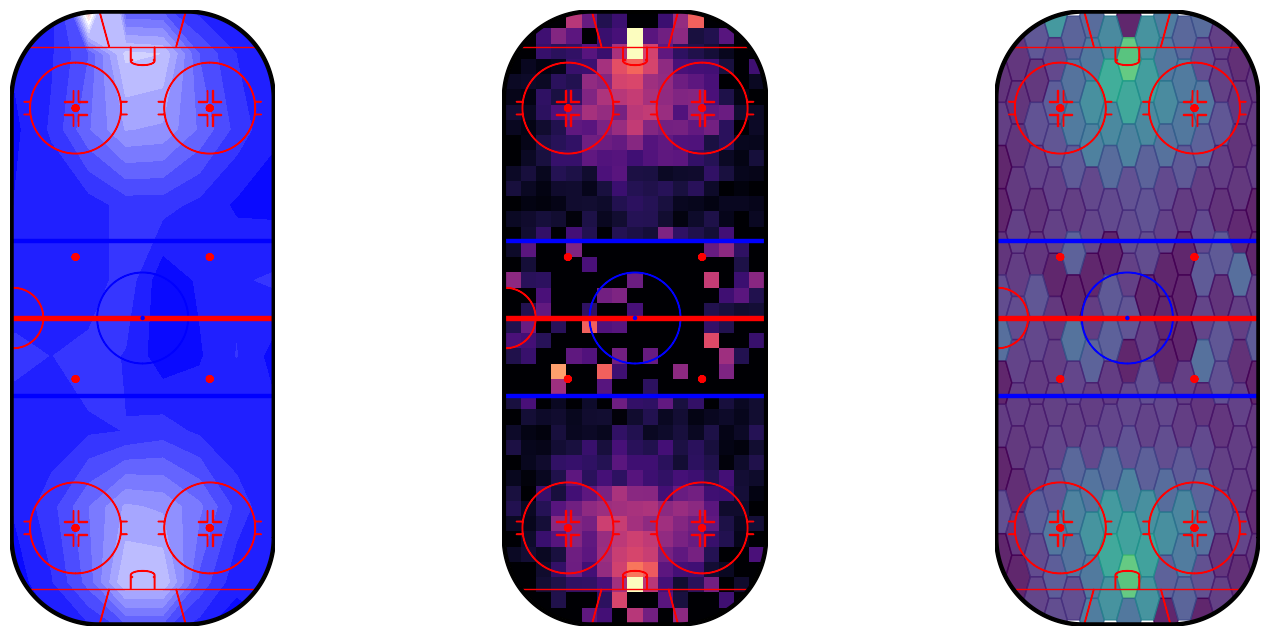

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

rink = NHLRink(rotation=270, net={"visible": False})

rink.contourf(
    "arenaAdjustedXCord", "arenaAdjustedYCord", "goal", data=shots2022,
    nbins=8, levels=30, cmap="bwr",
    ax=axs[0]
)
rink.heatmap(
    "arenaAdjustedXCord", "arenaAdjustedYCord", "goal", data=shots2022,
    binsize=5, fill_value=0, plot_xlim=(-180, 180), cmap="magma", vmax=0.25,
    ax=axs[1],
)

rink.hexbin(
    "arenaAdjustedXCord", "arenaAdjustedYCord", "goal", data=shots2022,
    gridsize=(14, 8), alpha=0.85, vmax=0.25,
    ax=axs[2]
)

In [ ]:
vegasShots=shots2022[(shots2022['teamCode'] == 'VGK')]

In [ ]:
vegasShots

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
252,252,12.727922,80.0,80.0,9.0,9.0,-39.75,0,120,65,...,80,0.076328,0.060403,0.243436,0.571461,0.018984,0.029388,0.778866,9,9
254,254,15.000000,77.0,77.0,-9.0,9.0,-7.00,0,0,0,...,77,0.113103,0.091022,0.420418,0.295037,0.018455,0.061965,0.805170,-9,-9
255,255,7.071068,84.0,84.0,-5.0,5.0,0.00,0,0,0,...,84,0.185601,0.128760,0.334619,0.219321,0.020284,0.111416,0.934720,-5,-5
257,257,56.612719,35.0,35.0,17.0,17.0,0.00,0,0,0,...,35,0.167832,0.012457,0.410374,0.353250,0.018616,0.037471,0.665226,17,17
259,259,35.440090,55.0,55.0,10.0,10.0,-8.40,0,0,0,...,55,0.118263,0.035197,0.459763,0.315875,0.032752,0.038149,0.375763,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122014,90,44.000000,45.0,45.0,1.0,1.0,0.00,1,0,0,...,48,0.012575,0.682678,0.146004,0.124367,0.012986,0.021390,0.629955,1,1
122015,91,45.000000,46.0,46.0,12.0,12.0,0.00,1,0,0,...,48,0.015448,0.661371,0.137274,0.152136,0.017170,0.016602,0.605681,11,11
122016,92,31.000000,58.0,58.0,1.0,1.0,0.00,1,0,0,...,60,0.010618,0.856276,0.060387,0.050964,0.007421,0.014333,0.717576,1,1
122024,100,59.000000,-38.0,38.0,-30.0,30.0,0.00,0,0,0,...,36,0.221936,0.014612,0.441810,0.259919,0.023903,0.037820,0.632146,-31,31


In [ ]:
import altair as alt
import numpy as np

# Calculate the shot angle in degrees
shots_data['shotAngle'] = np.degrees(np.arctan2(shots_data['arenaAdjustedYCordAbs'], shots_data['arenaAdjustedXCordABS']))

# Create an Altair chart
chart = alt.Chart(shots_data).mark_circle(size=60).encode(
    x=alt.X('shotAngle', title='Shot Angle (degrees)'),
    y=alt.Y('xGoal', title='Expected Goal Value'),
    tooltip=['shotID', 'arenaAdjustedShotDistance', 'shotAngle', 'xGoal'],
    color=alt.Color('xGoal', scale=alt.Scale(scheme='redblue'), title='Expected Goal Value')
).properties(
    title='Shot Angle vs Expected Goal Value',
    width=800,
    height=400
)

chart.display()


NameError: ignored

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

rink = NHLRink(rotation=270, net={"visible": False})

rink.contourf(
    "arenaAdjustedXCord", "arenaAdjustedYCord", "goal", data=vegasShots,
    nbins=10, levels=30, cmap="bwr",
    ax=axs[0]
)
rink.heatmap(
    "arenaAdjustedXCord", "arenaAdjustedYCord", "goal", data=vegasShots,
    binsize=5, fill_value=0, plot_xlim=(-180, 180), cmap="magma", vmax=0.25,
    ax=axs[1],
)
rink.hexbin(
    "arenaAdjustedXCord", "arenaAdjustedYCord", "goal", data=vegasShots,
    gridsize=(14, 8), alpha=0.85, vmax=0.25,
    ax=axs[2]
)

In [ ]:
xGoal=vegasShots.loc[:, 'xGoal'].mean()
xFroze=vegasShots.loc[:, 'xFroze'].mean()
xPlayContInZone=vegasShots.loc[:, 'xPlayContinuedInZone'].mean()
xPlayContOutZone=vegasShots.loc[:, 'xPlayContinuedOutsideZone'].mean()
xPlayStopped=vegasShots.loc[:, 'xPlayStopped'].mean()
xRebound=vegasShots.loc[:, 'xRebound'].mean()

In [ ]:
avgDF = pd.DataFrame(dict(
    r=[xGoal,xFroze,xPlayContInZone,xPlayContOutZone,xPlayStopped,xRebound],
    theta=['xGoal','xFroze','xPlayContInZone','xPlayContOutZone','xPlayStopped','xRebound']))

In [ ]:
fig = px.line_polar(avgDF, r='r', theta='theta')
fig.update_traces(fill='toself')
fig.show()

In [ ]:
vegasShots.plot.scatter(x='shotDistance',y='xGoal')

In [ ]:
mcDavidShots=shots2022[(shots2022['shooterName'] == 'Connor McDavid')]

In [ ]:
mcDavidShots

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

rink = NHLRink(rotation=90, net={"visible": False})

rink.contourf(
    "arenaAdjustedXCordABS", "arenaAdjustedYCordAbs", "goal", data=mcDavidShots,
    nbins=8, levels=30, plot_range="ozone", cmap="bwr",
    ax=axs[0], draw_kw={"display_range": "ozone"},
)

rink.heatmap(
    "arenaAdjustedXCord", "arenaAdjustedYCord", "goal", data=mcDavidShots,
    binsize=5, fill_value=0, plot_xlim=(0, 100), cmap="magma", vmax=0.25,
    ax=axs[1], draw_kw={"display_range": "ozone"},
)

rink.hexbin(
    "arenaAdjustedXCord", "arenaAdjustedYCord", "goal", data=mcDavidShots,
    gridsize=(14, 8), plot_range="ozone", alpha=0.85, vmax=0.25,
    ax=axs[2], draw_kw={"display_range": "ozone"},
)

In [ ]:
alt.data_transformers.disable_max_rows()
# Calculate the shot angle in degrees
shots2022['shotAngle'] = np.degrees(np.arctan2(shots2022['arenaAdjustedYCordAbs'], shots2022['arenaAdjustedXCordABS']))

# Create an Altair chart
chart = alt.Chart(shots2022).mark_circle(size=60).encode(
    x=alt.X('shotAngle', title='Shot Angle (degrees)'),
    y=alt.Y('xGoal', title='Expected Goal Value'),
    tooltip=['shotID', 'arenaAdjustedShotDistance', 'shotAngle', 'xGoal'],
    color=alt.Color('xGoal', scale=alt.Scale(scheme='redblue'), title='Expected Goal Value')
).properties(
    title='Shot Angle vs Expected Goal Value',
    width=800,
    height=400
)

chart


In [ ]:
# Probability of a shot resulting in a goal depending on distance
# Scatter plot of average shot distance and goal provabiliits bt NHL team.
# this identified EDM as the highest probability shooting team, and ANA as the lowest. next lets compare these two teams side by side,
# looking at each players shooting tendencies to identify where this difference comes from.

# Aggregate data by average for each team
aggregated_data = shots2022.groupby('teamCode').agg(
    avg_shot_distance=('arenaAdjustedShotDistance', 'mean'),
    avg_goal_probability=('xGoal', 'mean')
).reset_index()

# Define the scatter plot with aggregated data
scatter = alt.Chart(aggregated_data).mark_point().encode(
    x="avg_shot_distance:Q",
    y="avg_goal_probability:Q",
    color='teamCode:N',
    tooltip=['teamCode:N', 'avg_shot_distance:Q', 'avg_goal_probability:Q']
).properties(
    width=400,
    height=400
)

scatter


In [ ]:
# This shows every goal and how far away it was. Looks like there is an area between 5 and 35 on the x axis
# where there are significantly more shots for the higher probability team, an area lacking from the low probablity team.


# Code
#  Calculate average goal probability for each team
team_avg_prob = shots2022.groupby('teamCode')['xGoal'].mean().reset_index()

# Identify the teams with the highest and lowest average goal probability
highest_prob_team = team_avg_prob.loc[team_avg_prob['xGoal'].idxmax()]['teamCode']
lowest_prob_team = team_avg_prob.loc[team_avg_prob['xGoal'].idxmin()]['teamCode']

# Filter data for the highest and lowest probability teams
highest_prob_data = shots2022[shots2022['teamCode'] == highest_prob_team]
lowest_prob_data = shots2022[shots2022['teamCode'] == lowest_prob_team]

# Create scatter plots for each team
scatter_highest = alt.Chart(highest_prob_data).mark_point().encode(
    x='arenaAdjustedShotDistance:Q',
    y='xGoal:Q',
    color='shooterName:N',
    tooltip=['shooterName:N', 'arenaAdjustedShotDistance:Q', 'xGoal:Q']
).properties(
    width=300,
    height=300,
    title=f'Team {highest_prob_team}' + str(" (high probabilty shooters)")
)

scatter_lowest = alt.Chart(lowest_prob_data).mark_point().encode(
    x='arenaAdjustedShotDistance:Q',
    y='xGoal:Q',
    color='shooterName:N',
    tooltip=['shooterName:N', 'arenaAdjustedShotDistance:Q', 'xGoal:Q']
).properties(
    width=300,
    height=300,
    title=f'Team {lowest_prob_team}' + str(" (low probabilty shooters)")
)

# Display the graphs side by side
scatter_highest | scatter_lowest

In [ ]:
# # Using interactive selction you can select this region (or any other) and plot these points of the corresponding bar graph below
# looks like the higher probability team (left) has a lot more shots in the short distance, which correlate with higher goal probabiliry.

# Sample a subset of data for visualization using stratified sample
sampled_data = shots2022.sample(n=5000, random_state=1).groupby('teamCode', group_keys=False).apply(lambda x: x.sample(min(len(x), 2500)))

# Manually define the high and low probability teams
highest_prob_team = "EDM"
lowest_prob_team = "ANA"

# Filter data for the specified teams
highest_prob_data = sampled_data[sampled_data['teamCode'] == highest_prob_team]
lowest_prob_data = sampled_data[sampled_data['teamCode'] == lowest_prob_team]

# Create a shared brush for the selection
shared_brush = alt.selection_interval()

# Create scatter plots for each team with shared interactive brush
scatter_highest = alt.Chart(highest_prob_data).mark_point().encode(
    x='arenaAdjustedShotDistance:Q',
    y='xGoal:Q',
    color=alt.condition(shared_brush, 'shooterName:N', alt.value('lightgray')),
    tooltip=['shooterName:N', 'arenaAdjustedShotDistance:Q', 'xGoal:Q']
).add_selection(
    shared_brush
).properties(
    width=300,
    height=300,
    title=f'Team {highest_prob_team} (highest probability shooters)'
)

scatter_lowest = alt.Chart(lowest_prob_data).mark_point().encode(
    x='arenaAdjustedShotDistance:Q',
    y='xGoal:Q',
    color=alt.condition(shared_brush, 'shooterName:N', alt.value('lightgray')),
    tooltip=['shooterName:N', 'arenaAdjustedShotDistance:Q', 'xGoal:Q']
).add_selection(
    shared_brush
).properties(
    width=300,
    height=300,
    title=f'Team {lowest_prob_team} (lowest probability shooters)'
)

# Base bar graph showing the overall distribution of shot probabilities
base_bar_graph = alt.Chart(sampled_data).mark_bar(color='lightgray').encode(
    x=alt.X("arenaAdjustedShotDistance:Q", bin=alt.Bin(maxbins=20)),
    y=alt.Y("mean(xGoal):Q", title="Average Probability of Goal")
).properties(
    width=600,
    height=200
)

# Filtered bar graph highlighting the selected data using shared brush
filtered_bar_graph = alt.Chart(sampled_data).mark_bar(color='red').encode(
    x=alt.X("arenaAdjustedShotDistance:Q", bin=alt.Bin(maxbins=20)),
    y=alt.Y("mean(xGoal):Q", title="Average Probability of Goal")
).transform_filter(
    shared_brush
)

# Layering the filtered bar graph on top of the base bar graph
layered_bar_graph = base_bar_graph + filtered_bar_graph

# Add shared selection brush to the layered bar graph
layered_bar_graph = layered_bar_graph.add_selection(shared_brush)

# Combine the scatter plots and the layered bar graph
combined_chart = (scatter_highest | scatter_lowest) & layered_bar_graph

combined_chart



In [ ]:
import altair as alt
import pandas as pd

# Assuming 'shots2022' is your DataFrame
# Sample your data
sampled_data = shots2022.sample(n=5000, random_state=1).groupby('teamCode', group_keys=False).apply(lambda x: x.sample(min(len(x), 2500)))

# Create a shared brush for selection
shared_brush = alt.selection_interval()

# Dropdown for shot types
shot_types = sampled_data['shotType'].unique().tolist()
dropdown = alt.binding_select(options=shot_types, name="Shot Type ")
shot_select = alt.selection_single(fields=['shotType'], bind=dropdown, name="Shot Type")

# Scatter plot for Shot Distance vs. Expected Goal
scatter_highest = alt.Chart(sampled_data).mark_point().encode(
    x='arenaAdjustedShotDistance:Q',
    y='xGoal:Q',
    color=alt.condition(shared_brush, alt.value('steelblue'), alt.value('lightgray')),
    tooltip=['shooterName:N', 'arenaAdjustedShotDistance:Q', 'xGoal:Q']
).add_selection(
    shared_brush
).properties(
    width=300,
    height=300,
).transform_filter(
    shot_select
)

# Scatter plot for Shot Angle vs. Expected Goal
scatter_lowest = alt.Chart(sampled_data).mark_point().encode(
    x='shotAngle:Q',
    y='xGoal:Q',
    color=alt.condition(shared_brush, alt.value('green'), alt.value('lightgray')),
    tooltip=['shooterName:N', 'shotAngle:Q', 'xGoal:Q']
).add_selection(
    shared_brush
).properties(
    width=300,
    height=300,
).transform_filter(
    shot_select
)

# Base bar graph for overall distribution of shot probabilities
base_bar_graph = alt.Chart(sampled_data).mark_bar().encode(
    x=alt.X("shotDistance:Q", bin=alt.Bin(maxbins=20), title="Shot Distance"),
    y=alt.Y("mean(xGoal):Q", title="Average Probability of Goal"),
    color=alt.Color("mean(shotAngle):Q", scale=alt.Scale(scheme='greens'))
).properties(
    width=600,
    height=200,
).transform_filter(
    shared_brush
)

# Combine scatter plots horizontally
scatter_plots = alt.hconcat(scatter_highest, scatter_lowest).add_selection(shot_select)

# Vertical concatenation of scatter plots with the bar graph at the bottom
final_chart = alt.vconcat(scatter_plots, base_bar_graph).resolve_legend(
    color='independent'
).properties(
    title=alt.TitleParams(
        text="How Shot Distance and Angle Affect Goal Probability",
        anchor='middle',
        fontSize=20,
        offset=20
    )
)

# Display the final chart
final_chart


NameError: ignored

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
